## IMPORT DAS VÁRIAVEIS DE DADOS

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

membroexcel = 'banco-de-dados/perna-direita/JD 1 QD 1.xlsx' #JOELHO 1, QUADRIL 0
membrocsv = 'banco-de-dados/perna-direita/JD 1 QD 1.csv' #JOELHO 1, QUADRIL 0
df_csv = pd.read_csv(membrocsv, header=0, usecols=lambda col: col.strip(), engine='python')
df_excel = pd.read_excel(membroexcel)

### PLOTAGEM DOS GRÁFICOS DO CSV 
- COMPARAÇÃO DOS VALORES DE ANGULOS DO JOELHO E DA CINTURA

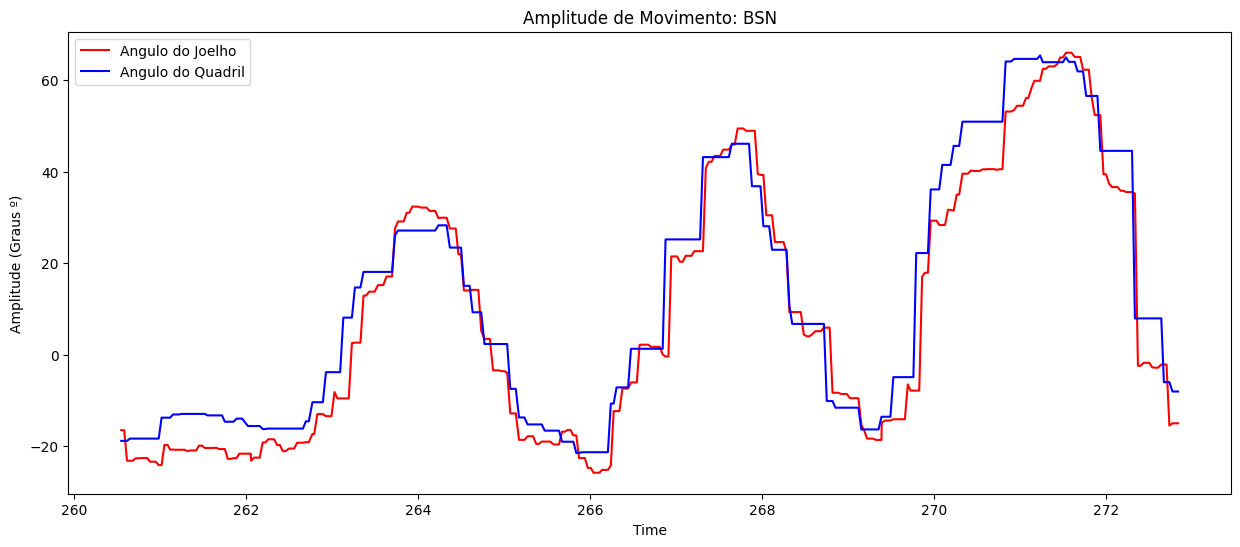

In [65]:
tempo = df_csv.columns[0] 
ang_joelho = df_csv.columns[-1]
ang_quadril = df_csv.columns[-2]

# Criando o gráfico usando a primeira e a última coluna
plt.figure(figsize=(15, 6))
plt.plot(df_csv[tempo], (df_csv[ang_joelho]*-1) + 180, color = 'red')
plt.plot(df_csv[tempo], (df_csv[ang_quadril]*-1) +180, color = 'blue')
plt.title('Amplitude de Movimento: BSN')
plt.xlabel(tempo)
#plt.xlim(171,185)
plt.legend(['Angulo do Joelho', 'Angulo do Quadril'])
plt.ylabel("Amplitude (Graus º)")
plt.show()

## PLOTAGEM DOS GRÁFICOS EXCEL
- COMPARAÇÃO DOS ANGULOS DO JOELHO E DO QUADRIL


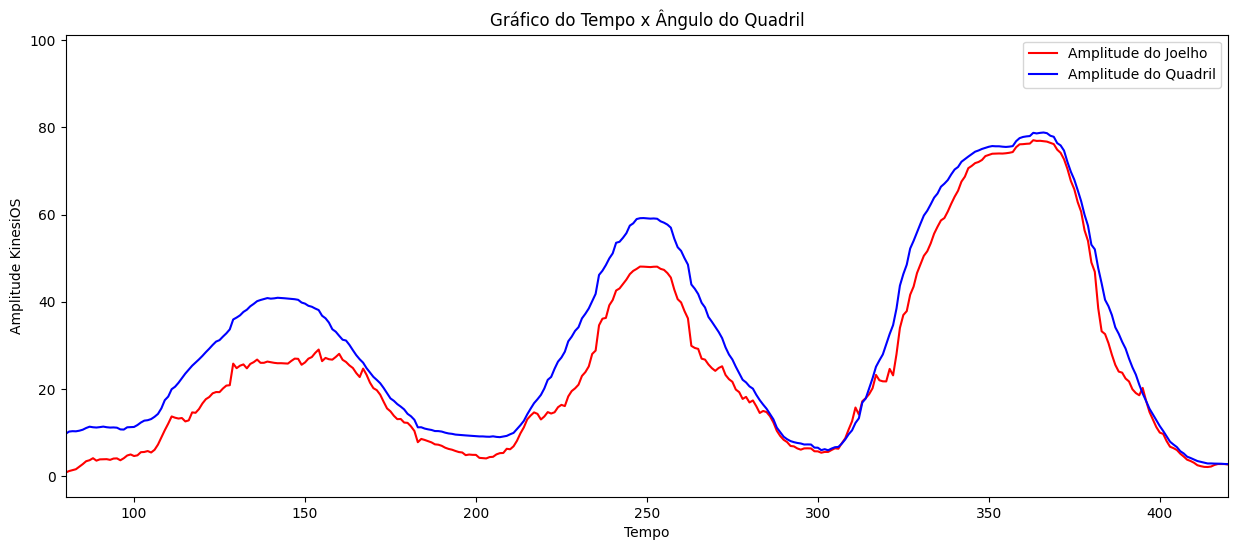

In [66]:
quadro = df_excel['Quadro']
amplitude_joelho = df_excel['Amplitude do Joelho (Direito)']
amplitude_quadril = df_excel['Amplitude do Quadril (Direito)']

plt.figure(figsize=(15, 6))
plt.plot(quadro, amplitude_joelho, color = 'red' )
plt.plot(quadro, amplitude_quadril, color = 'blue')
plt.xlabel("Tempo")
plt.xlim(80,420)
plt.ylabel("Amplitude KinesiOS")
plt.title("Gráfico do Tempo x Ângulo do Quadril")
plt.legend(['Amplitude do Joelho', 'Amplitude do Quadril'])
plt.show()

## PLOTAGEM DOS QUATRO GRÁFICOS EM CONJUNTO
- COMPARAÇÃO DOS VALORES OBTIDOS DE UMA MESMA MEDIÇÃO



Indice e angulo do pico BSN
103    32.3402
216    49.3891
331    65.9321
Name: Goniometry Leg Angle, dtype: float64

Indice e tempo do pico BSN
103    263.9674
216    267.7534
331    271.5688
Name: Time, dtype: float64

Indices dos picos Excel
[247 362 495]

Amplitude dos angulos Excel
247    0
362    0
495    0
Name: Amplitude do Joelho (Esquerdo), dtype: int64

Tempo dos picos Excel
247    248
362    363
495    496
Name: Quadro, dtype: int64

Diferença de tempo entre picos BSN:  3.800700000000006

Tempo até pico BSN:  3.4178999999999746

Diferença de tempo entre picos KIN:  124.0

Multiplicador de tempos:  32.62556897413629

Offset Tempo:  256.366


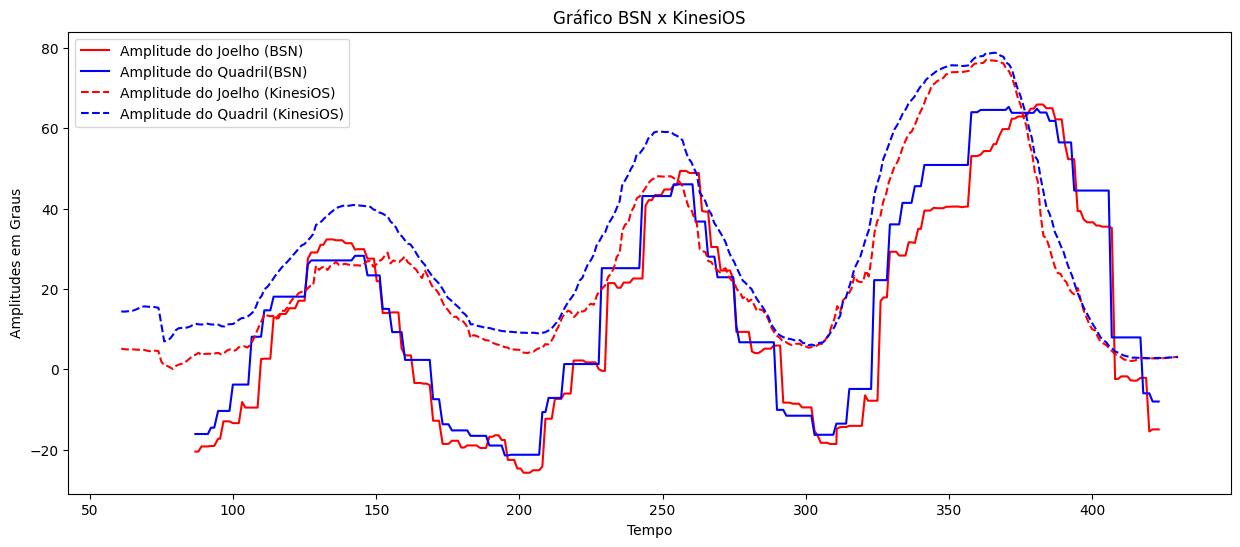

In [74]:
## DEFINIÇÃO DA VARIÁVEL PARA CLAQUETE  - JOELHO = 0 / PARA CLAQUETE QUADRIL = 1
claquete = 0
if claquete not in [0, 1]:
    raise ValueError("A variável 'claquete' deve ser 0 ou 1.")

## PEGANDO VARIÁVEIS E PICOS
tempo = df_csv.columns[0] 
ang_joelho = df_csv.columns[-1]
ang_quadril = df_csv.columns[-2]
    
quadro = df_excel['Quadro']
amplitude_joelho  = df_excel['Amplitude do Joelho (Direito)']
amplitude_quadril = df_excel['Amplitude do Quadril (Direito)']

if(claquete == 0):
    peaks_BSN_1, prop = find_peaks((df_csv[ang_joelho]*-1) + 180, distance = 50, height=(df_csv[ang_joelho][0]*-1) + 190)
    peaks_BSN_2, prop = find_peaks((df_csv[ang_quadril]*-1) + 180, distance = 50, height=(df_csv[ang_quadril][0]*-1) + 190)
    peaks_KIN_1, prop = find_peaks(amplitude_joelho, distance = 50, height = amplitude_joelho[0] + 10)
    peaks_KIN_2, prop = find_peaks(amplitude_quadril, distance = 50, height = amplitude_quadril[0] + 10)
elif(claquete == 1):
    peaks_BSN_2, prop = find_peaks((df_csv[ang_joelho]*-1) + 180, distance = 50, height=(df_csv[ang_joelho][0]*-1) + 190)
    peaks_BSN_1, prop = find_peaks((df_csv[ang_quadril]*-1) + 180, distance = 50, height=(df_csv[ang_quadril][0]*-1) + 190)
    peaks_KIN_2, prop = find_peaks(amplitude_joelho, distance = 50, height = amplitude_joelho[0] + 10)
    peaks_KIN_1, prop = find_peaks(amplitude_quadril, distance = 50, height = amplitude_quadril[0] + 10)


## PRINTANDO OS VALORES DE PICOS
print("\nIndice e angulo do pico BSN")
print((df_csv[ang_joelho][peaks_BSN_1]*-1) + 180) #printa o angulo, não precisa saber na real, mas bom p debugar

print("\nIndice e tempo do pico BSN")
print(df_csv[tempo][peaks_BSN_1]) #printa o momento em que houve o pico -> usado pra sincronizar

print("\nIndices dos picos Excel")
print(peaks_KIN_1)

print("\nAmplitude dos angulos Excel")
print(df_excel['Amplitude do Joelho (Esquerdo)'][peaks_KIN_1])

print("\nTempo dos picos Excel")
print(df_excel['Quadro'][peaks_KIN_1])

## DEFININDO OS OFFSETS
tempo2 = peaks_BSN_1[2]
tempo1 = peaks_BSN_1[1]
tempo0 = peaks_BSN_1[0]
bsn_delta_picos = df_csv[tempo][tempo1] - df_csv[tempo][tempo0]
bsn_delta_picos = (bsn_delta_picos + df_csv[tempo][tempo2] - df_csv[tempo][tempo1])/2
print("\nDiferença de tempo entre picos BSN: ", bsn_delta_picos)

bsn_tempoatepico = df_csv[tempo][tempo0] - df_csv[tempo][0]
print("\nTempo até pico BSN: ", bsn_tempoatepico)

tempo2 = peaks_KIN_1[2]
tempo1 = peaks_KIN_1[1]
tempo0 = peaks_KIN_1[0]
kin_delta_picos = df_excel['Quadro'][tempo1] - df_excel['Quadro'][tempo0]
kin_delta_picos = (kin_delta_picos + df_excel['Quadro'][tempo2] - df_excel['Quadro'][tempo1])/2
print("\nDiferença de tempo entre picos KIN: ", kin_delta_picos)

multiplicador_tempo = kin_delta_picos/bsn_delta_picos
print("\nMultiplicador de tempos: ", multiplicador_tempo)

offset_tempo = df_csv[tempo][0] - df_excel['Quadro'][tempo0]/multiplicador_tempo + bsn_tempoatepico
print("\nOffset Tempo: ", offset_tempo)

offset_tempo = offset_tempo + 3.5

df_temp_csv = df_csv.copy()

df_temp_csv[tempo] = (df_csv[tempo]-offset_tempo)*multiplicador_tempo
df_temp_csv[ang_quadril] = (df_csv[ang_quadril] * -1) + 180
df_temp_csv[ang_joelho] = (df_csv[ang_joelho] * -1) + 180

df_temp_csv = df_temp_csv.iloc[60:430]

df_temp_excel = df_excel.copy()
df_temp_excel = df_temp_excel.iloc[60:430]

quadro = df_temp_excel['Quadro']
amplitude_joelho  = df_temp_excel['Amplitude do Joelho (Direito)']
amplitude_quadril = df_temp_excel['Amplitude do Quadril (Direito)']

## PLOTANDO OS GRAFICOS COM OS OFFSETS
plt.figure(figsize=(15, 6))
plt.plot(df_temp_csv[tempo], df_temp_csv[ang_joelho], linestyle='-', color = 'red') # tem que arrumar alguma maneira de fazer esse offset automaticamente
plt.plot(df_temp_csv[tempo], df_temp_csv[ang_quadril], linestyle='-', color = 'blue') # pegar o maior pico dos dois e juntar, talvez mas isso ai vai desconsiderar offsets 
plt.plot(quadro, amplitude_joelho, linestyle='--', color = 'red')                                     # ou utilizar codigo que já desqualifica os offsets
plt.plot(quadro, amplitude_quadril, linestyle='--', color = 'blue')
#plt.xlim(df_excel['Quadro'][tempo0]-50,df_excel['Quadro'][tempo2]+50) #PRECISA SUBSTITUIR ESSE TEMPO2 POR ALGO MAIS UNIVERSAL
#plt.xlim(60,430) #PRECISA SUBSTITUIR ESSE TEMPO2 POR ALGO MAIS UNIVERSAL
plt.xlabel("Tempo")
plt.ylabel("Amplitudes em Graus")
plt.title("Gráfico BSN x KinesiOS")
plt.legend(['Amplitude do Joelho (BSN)', 'Amplitude do Quadril(BSN)','Amplitude do Joelho (KinesiOS)','Amplitude do Quadril (KinesiOS)'])
plt.show()

In [86]:
import numpy as np
import matplotlib.pyplot as plt

if len(df_temp_csv[tempo]) != len(amplitude_joelho):
    # Ajusta o comprimento das séries para garantir que correspondam
    min_length = min(len(df_temp_csv[tempo]), len(amplitude_joelho))
    df_temp_csv = df_temp_csv.iloc[:min_length]
    amplitude_joelho = amplitude_joelho[:min_length]
    amplitude_quadril = amplitude_quadril[:min_length]

# Assumindo que df_temp_csv contém os dados de BSN e df_temp_excel contém os dados de KinesiOS
# Verifique se as colunas de interesse estão presentes

# Calcula a diferença entre a amplitude medida e as amplitudes de referência
# Se df_temp_csv contém os dados de BSN e df_temp_excel contém os dados de KinesiOS

# Para o joelho
diferenca_joelho = df_temp_csv[ang_joelho].values - amplitude_joelho.values

# Para o quadril
diferenca_quadril = df_temp_csv[ang_quadril].values - amplitude_quadril.values

# Calcula a área total das diferenças usando a regra dos trapézios
area_diferenca_joelho = np.trapz(np.abs(diferenca_joelho), x=df_temp_csv[tempo])
area_diferenca_quadril = np.trapz(np.abs(diferenca_quadril), x=df_temp_csv[tempo])

print(f"A diferença total de área para o joelho é: {area_diferenca_joelho}")
print(f"A diferença total de área para o quadril é: {area_diferenca_quadril}")

print("A media da diferença de amplitude para o joelho é: ", area_diferenca_joelho/430-60)

print("A media da diferença de amplitude para o quadril é: ", area_diferenca_quadril/430-60)

A diferença total de área para o joelho é: 10026.463806430333
A diferença total de área para o quadril é: 10692.583246459782
A media da diferença de amplitude para o joelho é:  -36.68264231062713
A media da diferença de amplitude para o quadril é:  -35.133527333814456


## COMPARAÇÃO ESTATÍSTICA DOS DADOS DOS GRÁFICOS
- NORMALIZAÇÃO DOS DADOS PARA COMPARAÇÃO DIRETA
- COMPARAÇÃO ESTATÍSTICA DOS DADOS



In [ ]:
## EXECUTAR SOMENTE UMA VEZ
## NORMALIZAÇÃO DOS VALORES PARA QUE SEJA POSSÍVEL RETIRAR AS DIFERENÇAS -> 
## TEM QUE ARRUMAR, A NORMALIZAÇÃO TA CONSIDERANDO O TEMPO PASSADO, DEVE CONSIDERAR OS INDICES, SENÃO SEMPRE VAI PERDER ALGUNS DADOS IMPORTANTES

df_csv_pos = df_csv.copy()
df_csv_pos[tempo] = (df_csv[tempo]-offset_tempo)*multiplicador_tempo
df_csv_pos[ang_joelho] = (df_csv_pos[ang_joelho]*-1) + 180
df_csv_pos[ang_quadril] = (df_csv_pos[ang_quadril]*-1) +180
offset_iloc = df_csv_pos[tempo][0]
offset_iloc_pos = df_excel['Quadro'][tempo2]+50-offset_iloc ### PRECISA SUBSTITUIR ESSE TEMPO2 (ALGO QUE SEJA MAIS UNIVERSAL)
df_csv_pos[tempo] = df_csv_pos[tempo] - offset_iloc
delta_tempo = df_csv_pos[tempo][2]-df_csv_pos[tempo][1]
df_csv_pos = df_csv_pos.iloc[:int(offset_iloc_pos/delta_tempo)]

## PEGANDO VARIÁVEIS E PICOS
tempo = df_csv_pos.columns[0] 
ang_joelho = df_csv_pos.columns[-1]
ang_quadril = df_csv_pos.columns[-2]

## MESMA COISA PARA O EXCEL
df_excel_pos = df_excel.copy()
quadro = df_excel_pos['Quadro']
df_excel_pos['Quadro'] = df_excel_pos['Quadro'] - int(offset_iloc)
df_excel_pos.index = df_excel_pos.index - int(offset_iloc)
df_excel_pos = df_excel_pos.iloc[int(offset_iloc):]
df_excel_pos= df_excel_pos.iloc[:int(offset_iloc_pos)]
amplitude_joelho  = df_excel_pos['Amplitude do Joelho (Esquerdo)']
amplitude_quadril = df_excel_pos['Amplitude do Quadril (Esquerdo)']

## RELACIONANDO O INDICE COM O TEMPO
ultimo_valor = df_csv_pos[tempo][len(df_csv_pos[tempo])-1]
print(ultimo_valor)


400.93235456626206


0        0.000000
1        1.112532
2        2.189176
3        3.285395
4        4.362039
          ...    
365    396.547478
366    397.643697
367    398.821480
368    399.849186
369    400.932355
Name: Time, Length: 370, dtype: float64
0        1
1        2
2        3
3        4
4        5
      ... 
474    475
475    476
476    477
477    478
478    479
Name: Quadro, Length: 479, dtype: int64
Média BSN de Amplitude do Joelho:  8.367934324324326
Média KIN de Amplitude de Joelho:  0.0
A diferença média entre as amplitudes do Joelho é de:  23.90323162162162

Média BSN de Amplitude do Quadril:  11.944128108108103
Média KIN de Amplitude de Quadril:  0.0
A diferença média entre as amplitudes do Quadril é de:  23.624556756756753


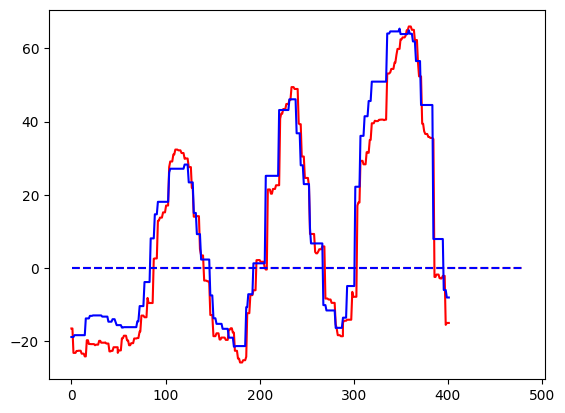

In [ ]:
## PEGANDO O MODULO DAS DIFERENÇAS DAS AMPLITUDES

print(df_csv_pos[tempo])
print(df_excel_pos['Quadro'])

plt.plot(df_csv_pos[tempo], df_csv_pos[ang_joelho], linestyle='-', color = 'red')
plt.plot(df_excel_pos['Quadro'], amplitude_joelho, linestyle='--', color = 'red')      

plt.plot(df_csv_pos[tempo], df_csv_pos[ang_quadril], linestyle='-', color = 'blue')
plt.plot(df_excel_pos['Quadro'], amplitude_quadril, linestyle='--', color = 'blue')      

df_deltas = abs(df_csv_pos[ang_joelho] - amplitude_joelho)
media_delta = df_deltas.mean()
media_angjoelho_bsn = df_csv_pos[ang_joelho].mean()
media_angjoelho_kin = amplitude_joelho.mean()

print("Média BSN de Amplitude do Joelho: ",media_angjoelho_bsn)
print("Média KIN de Amplitude de Joelho: ",media_angjoelho_kin)
print("A diferença média entre as amplitudes do Joelho é de: ",media_delta)

df_deltas = abs(df_csv_pos[ang_quadril] - amplitude_quadril)
media_delta = df_deltas.mean()
media_angquadril_bsn = df_csv_pos[ang_quadril].mean()
media_angquadril_kin = amplitude_quadril.mean()

print("\nMédia BSN de Amplitude do Quadril: ",media_angquadril_bsn)
print("Média KIN de Amplitude de Quadril: ",media_angquadril_kin)
print("A diferença média entre as amplitudes do Quadril é de: ",media_delta)
